In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import  pandas as pd



In [37]:
data= pd.read_csv("bulldozer_data/Train.csv", low_memory= False, parse_dates=["saledate"])

In [38]:
data.head()


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   401125 non-null  int64         
 1   SalePrice                 401125 non-null  int64         
 2   MachineID                 401125 non-null  int64         
 3   ModelID                   401125 non-null  int64         
 4   datasource                401125 non-null  int64         
 5   auctioneerID              380989 non-null  float64       
 6   YearMade                  401125 non-null  int64         
 7   MachineHoursCurrentMeter  142765 non-null  float64       
 8   UsageBand                 69639 non-null   object        
 9   saledate                  401125 non-null  datetime64[ns]
 10  fiModelDesc               401125 non-null  object        
 11  fiBaseModel               401125 non-null  object        
 12  fi

In [40]:
data.saledate.dtypes

dtype('<M8[ns]')

In [6]:
#dtype '<M8[ns]' is datetime65_ns in numpy"

In [41]:
data.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    258360
UsageBand                   331486
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             137191
fiModelSeries               344217
fiModelDescriptor           329206
ProductSize                 210775
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                296764
Enclosure                      325
Forks                       209048
Pad_Type                    321991
Ride_Control                252519
Stick                       321991
Transmission                217895
Turbocharged                321991
Blade_Extension     

Text(0.5, 0, 'Sale Price')

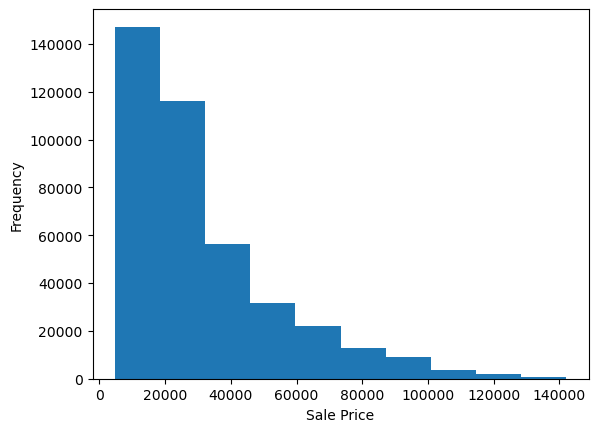

In [42]:
data.SalePrice.plot.hist()
plt.xlabel("Sale Price")

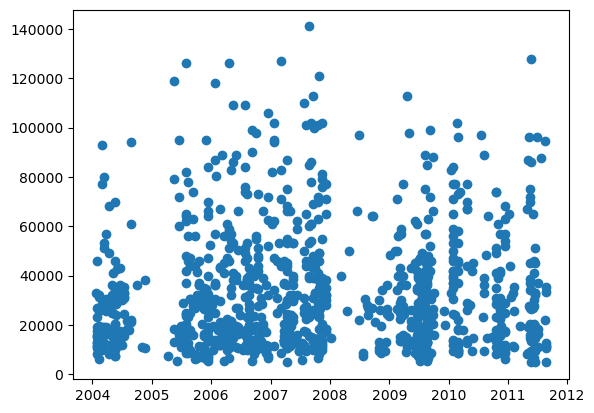

In [43]:
plt.scatter(data['saledate'][:1000], data["SalePrice"][:1000])

In [10]:
data.sort_values(by=["saledate"],inplace=True,ascending=True)

In [44]:
data.head(100)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1139543,25500,1024992,4794,121,3.0,1996,1056.0,Low,2005-12-15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,1139545,17500,273291,7014,121,3.0,2001,350.0,Low,2004-01-29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,1139546,64000,1031217,4789,121,3.0,2002,5516.0,Medium,2008-09-18,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,NaN,NaN
98,1139547,20500,332277,1571,121,3.0,1980,0.0,NaN,2005-11-03,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,NaN,NaN


In [45]:
data_tmp=data.copy()

In [46]:
data_tmp["saleyear"]=data_tmp.saledate.dt.year
data_tmp["salemonth"]=data_tmp.saledate.dt.month
data_tmp['saleday']=data_tmp.saledate.dt.day
data_tmp["saledayofweek"]=data_tmp.saledate.dt.dayofweek
data_tmp["saledayofyear"]=data_tmp.saledate.dt.dayofyear
data_tmp.drop("saledate",axis=1,inplace=True)
data_tmp.head()


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleyear,salemonth,saleday,saledayofweek,saledayofyear
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,521D,...,NaN,NaN,NaN,Standard,Conventional,2006,11,16,3,320
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,950FII,...,NaN,NaN,NaN,Standard,Conventional,2004,3,26,4,86
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,226,...,NaN,NaN,NaN,NaN,NaN,2004,2,26,3,57
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,PC120-6E,...,NaN,NaN,NaN,NaN,NaN,2011,5,19,3,139
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,S175,...,NaN,NaN,NaN,NaN,NaN,2009,7,23,3,204


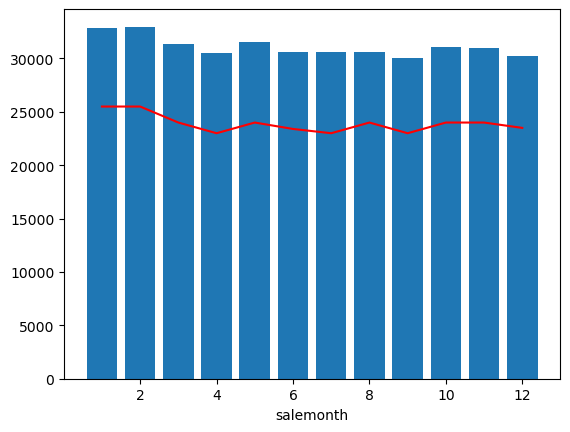

In [58]:
#group by month
monthly_mean_saleprice=data_tmp.groupby("salemonth")["SalePrice"].mean()
plt.bar(x=monthly_mean_saleprice.index, height=monthly_mean_saleprice)
monthly_mean_saleprice=data_tmp.groupby("salemonth")["SalePrice"].median().plot(color="red")

In [59]:
data_tmp.state.dtype



dtype('O')

In [15]:
#numeric columns
for label, content in data_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print (label)


auctioneerID
MachineHoursCurrentMeter


In [62]:
#filling null values in numeric data
for label, content in data_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #data_tmp[label+"is_missing"]=pd.isnull(content)
            data_tmp[label]=content.fillna(content.median())

In [61]:
data_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleyear,salemonth,saleday,saledayofweek,saledayofyear
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,521D,...,NaN,NaN,NaN,Standard,Conventional,2006,11,16,3,320
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,950FII,...,NaN,NaN,NaN,Standard,Conventional,2004,3,26,4,86
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,226,...,NaN,NaN,NaN,NaN,NaN,2004,2,26,3,57
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,PC120-6E,...,NaN,NaN,NaN,NaN,NaN,2011,5,19,3,139
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,S175,...,NaN,NaN,NaN,NaN,NaN,2009,7,23,3,204


In [63]:
#converting object, string  (non-numeric data )to categorical data
for label, content in data_tmp.items():
    if  pd.api.types.is_object_dtype(content):
        print(label)
        data_tmp[label]=content.astype("category")

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [65]:
data_tmp.T

,0,1,2,3,4,5,6,7,8,9,...,401115,401116,401117,401118,401119,401120,401121,401122,401123,401124
SalesID,1139246,1139248,1139249,1139251,1139253,1139255,1139256,1139261,1139272,1139275,...,6333290,6333302,6333307,6333311,6333335,6333336,6333337,6333338,6333341,6333342
SalePrice,66000,57000,10000,38500,11000,26500,21000,27000,21500,65000,...,10000,8500,10000,9500,8500,10500,11000,11500,9000,7750
MachineID,999089,117657,434808,1026470,1057373,1001274,772701,902002,1036251,1016474,...,1843374,1825337,1821747,1828862,1798293,1840702,1830472,1887659,1903570,1926965
ModelID,3157,77,7009,332,17311,4605,1937,3539,36003,3883,...,21437,21437,21437,21437,21435,21439,21439,21439,21435,21435
datasource,121,121,121,121,121,121,121,121,121,121,...,149,149,149,149,149,149,149,149,149,149
auctioneerID,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0
YearMade,2004,1996,2001,2001,2007,2004,1993,2001,2008,1000,...,2005,2005,2005,2006,2005,2005,2005,2005,2005,2005
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0,508.0,11540.0,4883.0,302.0,20700.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UsageBand,Low,Low,High,High,Medium,Low,High,High,Low,Medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fiModelDesc,521D,950FII,226,PC120-6E,S175,310G,790ELC,416D,430HAG,988B,...,35N,35N,35N,35N,30NX,35NX2,35NX2,35NX2,30NX,30NX


In [66]:
data_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   401125 non-null  int64   
 1   SalePrice                 401125 non-null  int64   
 2   MachineID                 401125 non-null  int64   
 3   ModelID                   401125 non-null  int64   
 4   datasource                401125 non-null  int64   
 5   auctioneerID              401125 non-null  float64 
 6   YearMade                  401125 non-null  int64   
 7   MachineHoursCurrentMeter  401125 non-null  float64 
 8   UsageBand                 69639 non-null   category
 9   fiModelDesc               401125 non-null  category
 10  fiBaseModel               401125 non-null  category
 11  fiSecondaryDesc           263934 non-null  category
 12  fiModelSeries             56908 non-null   category
 13  fiModelDescriptor         719

In [69]:
for label,content in data_tmp.items():
    if  pd.api.types.is_categorical_dtype(content):
        if pd.isnull(content).sum():
            print(label)
    



UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


/var/folders/4h/r7gyttvd4hb2grtt8036s0ch0000gn/T/ipykernel_30336/1021150481.py:2: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if  pd.api.types.is_categorical_dtype(content):


In [70]:
data_tmp["fiModelDesc"].cat.codes

0          949
1         1724
2          330
3         3673
4         4207
          ... 
401120     656
401121     656
401122     656
401123     482
401124     482
Length: 401125, dtype: int16

In [71]:
data_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   401125 non-null  int64   
 1   SalePrice                 401125 non-null  int64   
 2   MachineID                 401125 non-null  int64   
 3   ModelID                   401125 non-null  int64   
 4   datasource                401125 non-null  int64   
 5   auctioneerID              401125 non-null  float64 
 6   YearMade                  401125 non-null  int64   
 7   MachineHoursCurrentMeter  401125 non-null  float64 
 8   UsageBand                 69639 non-null   category
 9   fiModelDesc               401125 non-null  category
 10  fiBaseModel               401125 non-null  category
 11  fiSecondaryDesc           263934 non-null  category
 12  fiModelSeries             56908 non-null   category
 13  fiModelDescriptor         719

In [23]:
#filling Nan in categorical data
#for label,content in data_tmp.items():
    #if not pd.api.types.is_numeric_dtype(content):
        #if pd.isnull(content).sum():
            #data_tmp[label+"is_missing"]=pd.isnull(content)
            #cat_codes=pd.Categorical(content).codes
            #data_tmp[label]=cat_codes+1

In [73]:

# 1. Create a dictionary to store column to category values (e.g. we turn our category types into numbers but we keep a record so we can go back)
column_to_category_dict = {} 

# 2. Turn categorical variables into numbers
for label, content in data_tmp.items():

    # 3. Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(content):

        # 4. Add binary column to inidicate whether sample had missing value
        data_tmp[label+"_is_missing"] = pd.isnull(content).astype(int)

        # 5. Ensure content is categorical and get its category codes
        content_categories = pd.Categorical(content)
        content_category_codes = content_categories.codes + 1 # prevents -1 (the default for NaN values) from being used for missing values (we'll treat missing values as 0)

        # 6. Add column key to dictionary with code: category mapping per column
        column_to_category_dict[label] = dict(zip(content_category_codes, content_categories))
        
        # 7. Set the column to the numerical values (the category code value) 
        data_tmp[label] = content_category_codes   

In [24]:
#data_tmp.drop("saledate",axis=1,inplace=True)

data_tmp.head()


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleyear,salemonth,saleday,saledayofweek,saledayofyear
205615,1646770,9500,1126363,8434,132,18.0,1974,0.0,0,TD20,...,1,8,6,0,0,1989,1,17,1,17
92803,1404019,24000,1169900,7110,132,99.0,1986,0.0,0,416,...,0,0,0,0,0,1989,1,31,1,31
98346,1415646,35000,1262088,3357,132,99.0,1975,0.0,0,12G,...,0,0,0,0,0,1989,1,31,1,31
169297,1596358,19000,1433229,8247,132,99.0,1978,0.0,0,644,...,0,0,0,4,2,1989,1,31,1,31
274835,1821514,14000,1194089,10150,132,99.0,1980,0.0,0,A66,...,0,0,0,4,2,1989,1,31,1,31


In [74]:
X=data_tmp.drop("SalePrice",axis=1)
y=data_tmp["SalePrice"]
X.head(10)


,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1139246,999089,3157,121,3.0,2004,68.0,2,950,296,...,1,1,1,1,1,1,1,1,0,0
1,1139248,117657,77,121,3.0,1996,4640.0,2,1725,527,...,1,1,1,1,1,1,1,1,0,0
2,1139249,434808,7009,121,3.0,2001,2838.0,1,331,110,...,1,1,1,1,1,1,1,1,1,1
3,1139251,1026470,332,121,3.0,2001,3486.0,1,3674,1375,...,1,1,1,1,1,1,1,1,1,1
4,1139253,1057373,17311,121,3.0,2007,722.0,3,4208,1529,...,1,1,1,1,1,1,1,1,1,1
5,1139255,1001274,4605,121,3.0,2004,508.0,2,493,175,...,1,1,1,1,1,1,1,1,1,1
6,1139256,772701,1937,121,3.0,1993,11540.0,1,1453,419,...,0,0,0,0,0,1,1,1,1,1
7,1139261,902002,3539,121,3.0,2001,4883.0,1,740,243,...,1,1,1,1,1,1,1,1,1,1
8,1139272,1036251,36003,121,3.0,2008,302.0,2,779,250,...,0,0,0,0,0,1,1,1,1,1
9,1139275,1016474,3883,121,3.0,1000,20700.0,3,1771,540,...,1,1,1,1,1,1,1,1,0,0


In [75]:
X.dtypes

SalesID                           int64
MachineID                         int64
ModelID                           int64
datasource                        int64
auctioneerID                    float64
                                 ...   
Backhoe_Mounting_is_missing       int64
Blade_Type_is_missing             int64
Travel_Controls_is_missing        int64
Differential_Type_is_missing      int64
Steering_Controls_is_missing      int64
Length: 100, dtype: object

In [76]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_jobs=-1)
X.head()


,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1139246,999089,3157,121,3.0,2004,68.0,2,950,296,...,1,1,1,1,1,1,1,1,0,0
1,1139248,117657,77,121,3.0,1996,4640.0,2,1725,527,...,1,1,1,1,1,1,1,1,0,0
2,1139249,434808,7009,121,3.0,2001,2838.0,1,331,110,...,1,1,1,1,1,1,1,1,1,1
3,1139251,1026470,332,121,3.0,2001,3486.0,1,3674,1375,...,1,1,1,1,1,1,1,1,1,1
4,1139253,1057373,17311,121,3.0,2007,722.0,3,4208,1529,...,1,1,1,1,1,1,1,1,1,1


In [77]:

X.T

,0,1,2,3,4,5,6,7,8,9,...,401115,401116,401117,401118,401119,401120,401121,401122,401123,401124
SalesID,1139246.0,1139248.0,1139249.0,1139251.0,1139253.0,1139255.0,1139256.0,1139261.0,1139272.0,1139275.0,...,6333290.0,6333302.0,6333307.0,6333311.0,6333335.0,6333336.0,6333337.0,6333338.0,6333341.0,6333342.0
MachineID,999089.0,117657.0,434808.0,1026470.0,1057373.0,1001274.0,772701.0,902002.0,1036251.0,1016474.0,...,1843374.0,1825337.0,1821747.0,1828862.0,1798293.0,1840702.0,1830472.0,1887659.0,1903570.0,1926965.0
ModelID,3157.0,77.0,7009.0,332.0,17311.0,4605.0,1937.0,3539.0,36003.0,3883.0,...,21437.0,21437.0,21437.0,21437.0,21435.0,21439.0,21439.0,21439.0,21435.0,21435.0
datasource,121.0,121.0,121.0,121.0,121.0,121.0,121.0,121.0,121.0,121.0,...,149.0,149.0,149.0,149.0,149.0,149.0,149.0,149.0,149.0,149.0
auctioneerID,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Backhoe_Mounting_is_missing,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Blade_Type_is_missing,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Travel_Controls_is_missing,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Differential_Type_is_missing,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [78]:
model.fit(X,y)

RandomForestRegressor(n_jobs=-1)

In [79]:
data_tmp.saleyear.value_counts()

saleyear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [95]:
(data_tmp["saleyear"]==2011).sum()/ len(data_tmp["saleyear"]) ##assign it to validation set


np.float64(0.08774571517606732)

**Splitting data and defining training and validation set**

In [100]:
df_train= data_tmp[data_tmp["saleyear"]<2011]

df_train.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1139246,66000,999089,3157,121,3.0,2004,68.0,2,950,...,1,1,1,1,1,1,1,1,0,0
1,1139248,57000,117657,77,121,3.0,1996,4640.0,2,1725,...,1,1,1,1,1,1,1,1,0,0
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,1,331,...,1,1,1,1,1,1,1,1,1,1
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,3,4208,...,1,1,1,1,1,1,1,1,1,1
5,1139255,26500,1001274,4605,121,3.0,2004,508.0,2,493,...,1,1,1,1,1,1,1,1,1,1


In [101]:
df_valid= data_tmp[data_tmp["saleyear"]==2011]

In [109]:
X_train, y_train= df_train.drop ("SalePrice",axis=1) , df_train.SalePrice
X_valid, y_valid=df_valid.drop ("SalePrice",axis=1) , df_valid.SalePrice
len(X_train), len (y_train), len(X_valid), len(y_valid)

(365928, 365928, 35197, 35197)

**Defining function for Evalualtion Metrics**

In [111]:
%%time
#Root mean square log error, Root mean square error, R_2 score 
from sklearn.metrics import root_mean_squared_log_error, root_mean_squared_error, r2_score
def show_score(model):

    y_pred_train=model.predict(X_train)
    y_pred_valid= model.predict(X_valid)
    
    print(f" For training set : RMSLE is {root_mean_squared_log_error(y_train, y_pred_train):.2f}")
    print(f" For training set : RMSE is {root_mean_squared_error(y_train,y_pred_train):.2f}")
    print(f" For training set : R^2 score is {r2_score(y_train, y_pred_train):.2f}")

    print(f" For validation set : RMSLE is {root_mean_squared_log_error(y_valid, y_pred_valid):.2f}")
    print(f" For validation set : RMSE is {root_mean_squared_error(y_valid, y_pred_valid):.2f}")
    print(f" For validation set : R^2 score is {r2_score(y_valid, y_pred_valid):.2f}")


#Defining model , slicing data for fast run 
model = RandomForestRegressor (n_jobs=-1, random_state=11, max_samples= 20000)
model.fit(X_train, y_train)
show_score(model)



    
    
    

 For training set : RMSLE is 0.23
 For training set : RMSE is 7732.38
 For training set : R^2 score is 0.89
 For validation set : RMSLE is 0.27
 For validation set : RMSE is 10211.09
 For validation set : R^2 score is 0.83
CPU times: user 47.5 s, sys: 620 ms, total: 48.1 s
Wall time: 6.99 s


**Hyperparameters tuning and finding best fit model**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_grid={"n_estimators":np.arange(50,125,25), "max_depth":[None,10,20,30],"min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,5,1),"max_features":[0.5,None,"sqrt","log2"],"max_samples":[10000]}

In [ ]:
model_2= RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=11), param_distributions =rf_grid,n_iter=5, cv=5,verbose=True)

In [ ]:
model_2.fit(X_train, y_train)

In [134]:
%%time
show_score(model_2)
model_2.best_params_

 For training set : RMSLE is 0.26
 For training set : RMSE is 8722.77
 For training set : R^2 score is 0.85
 For validation set : RMSLE is 0.29
 For validation set : RMSE is 10687.49
 For validation set : R^2 score is 0.82
CPU times: user 2.48 s, sys: 180 ms, total: 2.66 s
Wall time: 658 ms


{'n_estimators': np.int64(100),
 'min_samples_split': np.int64(12),
 'min_samples_leaf': np.int64(1),
 'max_samples': 10000,
 'max_features': None,
 'max_depth': None}